# MODELLING

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
#from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings('ignore')

In [60]:
train = pd.read_csv("Housing_dataset_train.csv")
test = pd.read_csv("Housing_dataset_test.csv")
sub = pd.read_csv("Sample_submission.csv")
#var = pd.read_csv("VariableDefinitions.csv")

In [61]:
train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [62]:
train.drop_duplicates(inplace = True)

train.parking_space = train.parking_space.fillna(train.parking_space.mean())
train.bedroom = train.bedroom.fillna(train.bedroom.mean())
train.bathroom = train.bathroom.fillna(train.bathroom.mean())

In [63]:
train = train.reset_index(drop=True)
train = train.dropna(subset=['loc', 'title'])

In [64]:
train.isnull().sum()

ID               0
loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
price            0
dtype: int64

In [65]:
label_encoding = LabelEncoder()

# train_df.loc = label_encoding.fit(train_df['loc'])
# train_df.loc = label_encoding.transform(train_df['loc'])

train['loc'] = label_encoding.fit_transform(train['loc'])
train['title'] = label_encoding.fit_transform(train['title'])


# train_df.title = label_encoding.fit(train_df['title'])
# train_df.title = label_encoding.transform(train_df['title'])

train

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,19,7,2.000000,2.0,1.000000,1149999.565
1,2748,27,0,4.308171,2.0,4.000000,1672416.689
3,2224,3,3,5.000000,2.0,4.000000,2410306.756
4,10300,21,8,4.308171,5.0,6.000000,2600700.898
5,1733,7,5,4.308171,1.0,3.000000,1341750.867
...,...,...,...,...,...,...,...
13994,10477,33,3,8.000000,1.0,6.000000,2837199.086
13995,6175,11,1,4.308171,7.0,3.169825,2367927.861
13996,9704,17,0,4.308171,7.0,5.000000,2228516.471
13997,11190,30,1,8.000000,6.0,5.000000,2406812.693


In [66]:
label_encoding = LabelEncoder()

# train_df.loc = label_encoding.fit(train_df['loc'])
# train_df.loc = label_encoding.transform(train_df['loc'])

test['loc'] = label_encoding.fit_transform(test['loc'])
test['title'] = label_encoding.fit_transform(test['title'])


# train_df.title = label_encoding.fit(train_df['title'])
# train_df.title = label_encoding.transform(train_df['title'])

test

,ID,loc,title,bedroom,bathroom,parking_space
0,845,18,6,4,1,2
1,1924,1,0,2,2,4
2,10718,1,1,2,7,2
3,12076,23,5,9,5,2
4,12254,14,7,5,6,1
...,...,...,...,...,...,...
5995,1594,12,4,4,5,2
5996,2416,1,8,5,7,1
5997,10195,29,9,4,1,4
5998,9455,4,4,3,7,5


In [67]:
train['loc'].unique()

array([19, 27,  3, 21,  7, 22, 28, 17, 26,  5,  0, 31, 33, 10, 20, 13, 11,
       24, 18,  9, 34,  6,  4,  8, 25,  1, 30, 15, 29, 35, 32, 16, 14, 23,
        2, 12])

In [68]:
data = train.drop("price", axis=1).append(test)

In [69]:
train['title'] = train['title'].astype(int)

In [70]:
test['loc'].unique()

array([18,  1, 23, 14, 11, 25,  3,  6, 26, 21, 33, 34, 35,  7, 13, 12,  9,
       28, 29,  4, 22, 19,  8, 27,  2, 24, 10, 30, 17, 32, 20,  5, 16,  0,
       31, 15])

In [71]:
train[train['price'] > 0].reset_index(drop = True)

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,19,7,2.000000,2.0,1.000000,1149999.565
1,2748,27,0,4.308171,2.0,4.000000,1672416.689
2,2224,3,3,5.000000,2.0,4.000000,2410306.756
3,10300,21,8,4.308171,5.0,6.000000,2600700.898
4,1733,7,5,4.308171,1.0,3.000000,1341750.867
...,...,...,...,...,...,...,...
10526,10477,33,3,8.000000,1.0,6.000000,2837199.086
10527,6175,11,1,4.308171,7.0,3.169825,2367927.861
10528,9704,17,0,4.308171,7.0,5.000000,2228516.471
10529,11190,30,1,8.000000,6.0,5.000000,2406812.693


In [72]:
data = train.drop("price", axis=1).append(test)

In [73]:
X = data[:train.shape[0]]
y = train.price
test_new = data[train.shape[0]:]

In [74]:
X.shape, y.shape, test_new.shape

((10531, 6), (10531,), (6000, 6))

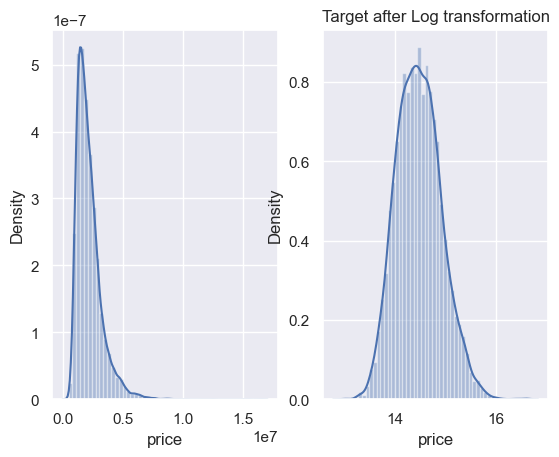

In [75]:
sns.set()
y_transformed = pd.Series(np.log1p(y))

fig, ax = plt.subplots(1, 2)
sns.distplot(y, ax=ax[0])
plt.title("Target after Log transformation")
# ax[0].axvline(y_transformed)
sns.distplot(y_transformed, ax=ax[1])
plt.show()

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
lgb = LGBMRegressor()
lgb.fit(X_train, y_train)
lgb_preds = lgb.predict(X_test)

print(f'mse = {mean_squared_error(y_test, lgb_preds, squared=False)}')

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000457 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 329
[LightGBM] [Info] Number of data points in the train set: 8424, number of used features: 6
[LightGBM] [Info] Start training from score 2131946.679554
mse = 382364.57276016334


In [78]:
predictions = lgb.predict(test)
predictions

array([2172312.44263083, 1067611.35241606, 1228385.96456952, ...,
       2030144.99915102, 1403165.01570381, 3599783.78302125])

In [79]:
sub.reset_index(drop=True, inplace=True)
sub['price'] = predictions
sub.head()

,ID,price
0,845,2.172312e+06
1,1924,1.067611e+06
2,10718,1.228386e+06
3,12076,6.952314e+06
4,12254,2.016614e+06


In [80]:
sub.to_csv('baseline Sam.csv', index=False)

In [81]:
fold_pred=[]
oof_pred = []

params = {
    'n_estimators': 500,
    'colsample_bytree': 0.86,
 'learning_rate': 0.032,
 'max_depth': 7,
 'subsample': 0.85}


fold = KFold(n_splits=7, shuffle=True)#15#5#10
i=1
for train_index, test_index in fold.split(X,y):     
  
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = np.log1p(y.iloc[train_index]), y.iloc[test_index]

    model = LGBMRegressor(**params, objective = "rmse")
    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)])#erly100

    preds= model.predict(X_test)
    print("err: ",(mean_squared_error(y_test,np.expm1(preds), squared=False)))  #Reverse transformation
    oof_pred.append(mean_squared_error(y_test,np.expm1(preds),squared=False))
    p2 = model.predict(test_new[X.columns])
    fold_pred.append(np.expm1(p2))
    

print(np.mean(oof_pred))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001266 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 329
[LightGBM] [Info] Number of data points in the train set: 9026, number of used features: 6
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score 14.464181
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
err:  398078.60952226864
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 329
[LightGBM] [Info] Number of data points in the train set: 9027, number of used features: 6
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > n

In [84]:
sub['price'] =  np.mean(fold_pred, axis = 0)

In [85]:
sub.head()

,ID,price
0,845,2.326527e+06
1,1924,1.047280e+06
2,10718,1.179355e+06
3,12076,7.978731e+06
4,12254,1.958043e+06


In [86]:
sub.to_csv('LGB kfold Baseline sam 2.csv', index=False)